In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
colunas_uteis = ['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4']

In [161]:
"""path2 = r'DADOS/MICRODADOS_ENEM_2022.csv'
path3 = r'DADOS/MICRODADOS_ENEM_2023.csv'

df_2022 = pd.read_csv(path2, sep=';', encoding ='ISO-8859-1')
df_2023 = pd.read_csv(path3, sep=';', encoding ='ISO-8859-1')


df_empilhado = pd.concat([df_2022, df_2023], axis=0, ignore_index=True)

df = df_empilhado.filter(items=colunas_uteis)
df.to_csv('dados_filtrados.csv')

df = pd.read_csv('dados_filtrados.csv')

coluna = ['RJ', 'ES', 'MG', 'SP']

df_regiao  = df[df['SG_UF_PROVA'].isin(coluna)]



"""

"path2 = r'DADOS/MICRODADOS_ENEM_2022.csv'\npath3 = r'DADOS/MICRODADOS_ENEM_2023.csv'\n\ndf_2022 = pd.read_csv(path2, sep=';', encoding ='ISO-8859-1')\ndf_2023 = pd.read_csv(path3, sep=';', encoding ='ISO-8859-1')\n\n\ndf_empilhado = pd.concat([df_2022, df_2023], axis=0, ignore_index=True)\n\ndf = df_empilhado.filter(items=colunas_uteis)\ndf.to_csv('dados_filtrados.csv')\n\ndf = pd.read_csv('dados_filtrados.csv')\n\ncoluna = ['RJ', 'ES', 'MG', 'SP']\n\ndf_regiao  = df[df['SG_UF_PROVA'].isin(coluna)]\n\n\n\n"

In [162]:
df = pd.read_csv('dados_filtrados_Sudeste.csv')


In [163]:
municipios = ['Saquarema', 'Araruama', 'Iguaba Grande', 'São Pedro da Aldeia']

In [164]:
df_rj = df[df['SG_UF_ESC'] == 'RJ']

df = df_rj[(df_rj['NO_MUNICIPIO_PROVA'].isin(municipios)) | (df_rj['SG_UF_ESC'] == 'RJ')]

In [165]:
df.value_counts('NO_MUNICIPIO_PROVA')
#df.value_counts('SG_UF_ESC')

NO_MUNICIPIO_PROVA
Rio de Janeiro        55066
Niterói                6259
Duque de Caxias        6072
São Gonçalo            5990
Nova Iguaçu            5497
                      ...  
São Caetano do Sul        1
Três Pontas               1
São Lourenço              1
Uberlândia                1
Viçosa                    1
Name: count, Length: 117, dtype: int64

In [166]:
df = df[(df['NU_NOTA_CN'] != 0) & 
        (df['NU_NOTA_CH'] != 0) & 
        (df['NU_NOTA_LC'] != 0) & 
        (df['NU_NOTA_MT'] != 0)]

NU_NOTA_CN
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_MT
NU_NOTA_REDACAO

### Nota em CN

Text(0, 0.5, 'Valores')

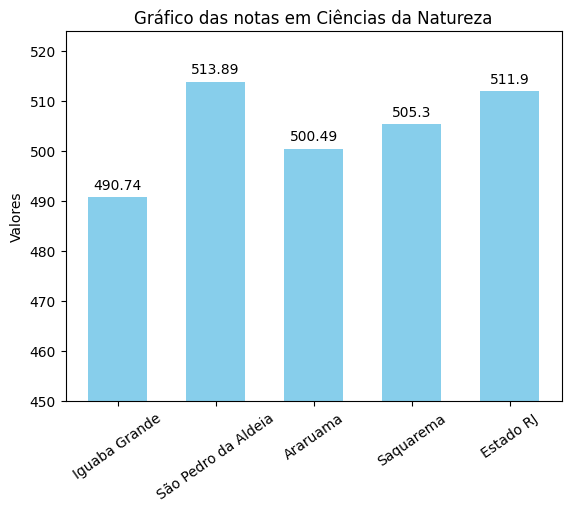

In [167]:
media_ig = df[df['NO_MUNICIPIO_PROVA'] == 'Iguaba Grande']['NU_NOTA_CN'].mean()
media_spa = df[df['NO_MUNICIPIO_PROVA'] == 'São Pedro da Aldeia']['NU_NOTA_CN'].mean()
media_ara = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_CN'].mean()
media_saqua = df[df['NO_MUNICIPIO_PROVA'] == 'Saquarema']['NU_NOTA_CN'].mean()
media_geral = df[df['SG_UF_ESC'] == 'RJ']['NU_NOTA_CN'].mean()

medias = [media_ig, media_spa, media_ara, media_saqua, media_geral]
cidades = ['Iguaba Grande','São Pedro da Aldeia', 'Araruama' ,'Saquarema', 'Estado RJ' ]


plt.ylim(450, max(medias) + 10)  
bars = plt.bar(cidades, medias,width=0.6, color='skyblue')
plt.xticks(rotation=35)  # Ajuste o valor do ângulo conforme necessário

for bar in bars:
    yval = round(bar.get_height(),2)  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
             str(yval), ha='center', va='bottom', fontsize=10)  
    

plt.title('Gráfico das notas em Ciências da Natureza')
plt.ylabel('Valores')

### Notas em CH

Text(0, 0.5, 'Valores')

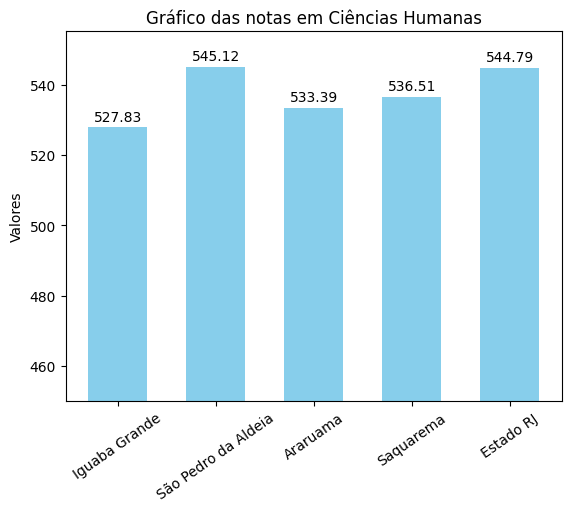

In [175]:
media_ig = df[df['NO_MUNICIPIO_PROVA'] == 'Iguaba Grande']['NU_NOTA_CH'].mean()
media_spa = df[df['NO_MUNICIPIO_PROVA'] == 'São Pedro da Aldeia']['NU_NOTA_CH'].mean()
media_ara = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_CH'].mean()
media_saqua = df[df['NO_MUNICIPIO_PROVA'] == 'Saquarema']['NU_NOTA_CH'].mean()
media_geral = df[df['SG_UF_ESC'] == 'RJ']['NU_NOTA_CH'].mean()

medias = [media_ig, media_spa, media_ara, media_saqua, media_geral]
cidades = ['Iguaba Grande','São Pedro da Aldeia', 'Araruama' ,'Saquarema', 'Estado RJ' ]


plt.ylim(450, max(medias) + 10)  
bars = plt.bar(cidades, medias,width=0.6, color='skyblue')
plt.xticks(rotation=35)  # Ajuste o valor do ângulo conforme necessário

for bar in bars:
    yval = round(bar.get_height(),2)  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
             str(yval), ha='center', va='bottom', fontsize=10)  
    

plt.title('Gráfico das notas em Ciências Humanas')
plt.ylabel('Valores')

### Nota da prova de Linguagens e Códigos


Text(0, 0.5, 'Valores')

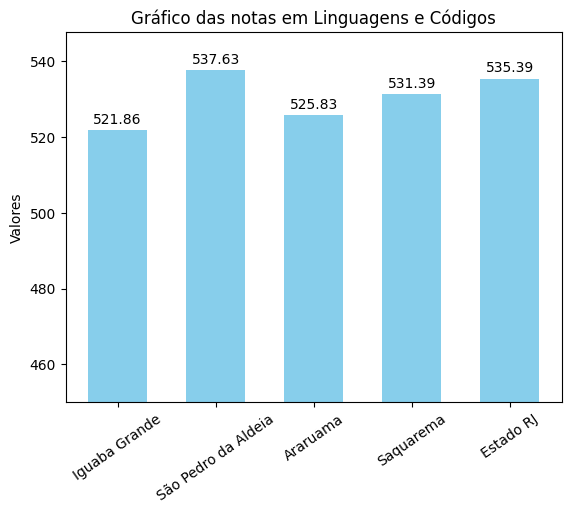

In [169]:
media_ig = df[df['NO_MUNICIPIO_PROVA'] == 'Iguaba Grande']['NU_NOTA_LC'].mean()
media_spa = df[df['NO_MUNICIPIO_PROVA'] == 'São Pedro da Aldeia']['NU_NOTA_LC'].mean()
media_ara = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_LC'].mean()
media_saqua = df[df['NO_MUNICIPIO_PROVA'] == 'Saquarema']['NU_NOTA_LC'].mean()
media_geral = df[df['SG_UF_ESC'] == 'RJ']['NU_NOTA_LC'].mean()

medias = [media_ig, media_spa, media_ara, media_saqua, media_geral]
cidades = ['Iguaba Grande','São Pedro da Aldeia', 'Araruama' ,'Saquarema', 'Estado RJ' ]


plt.ylim(450, max(medias) + 10)  
bars = plt.bar(cidades, medias,width=0.6, color='skyblue')
plt.xticks(rotation=35)  # Ajuste o valor do ângulo conforme necessário

for bar in bars:
    yval = round(bar.get_height(),2)  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
             str(yval), ha='center', va='bottom', fontsize=10)  
    

plt.title('Gráfico das notas em Linguagens e Códigos')
plt.ylabel('Valores')

### Nota da prova de Matemática (MT)

Text(0, 0.5, 'Valores')

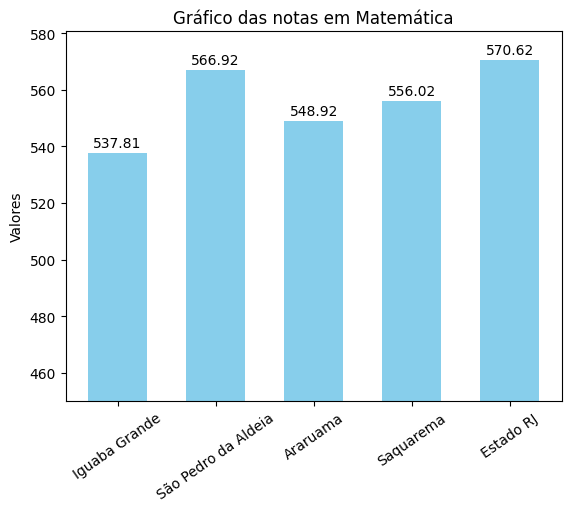

In [170]:
media_ig = df[df['NO_MUNICIPIO_PROVA'] == 'Iguaba Grande']['NU_NOTA_MT'].mean()
media_spa = df[df['NO_MUNICIPIO_PROVA'] == 'São Pedro da Aldeia']['NU_NOTA_MT'].mean()
media_ara = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_MT'].mean()
media_saqua = df[df['NO_MUNICIPIO_PROVA'] == 'Saquarema']['NU_NOTA_MT'].mean()
media_geral = df[df['SG_UF_ESC'] == 'RJ']['NU_NOTA_MT'].mean()

medias = [media_ig, media_spa, media_ara, media_saqua, media_geral]
cidades = ['Iguaba Grande','São Pedro da Aldeia', 'Araruama' ,'Saquarema', 'Estado RJ' ]


plt.ylim(450, max(medias) + 10)  
bars = plt.bar(cidades, medias,width=0.6, color='skyblue')
plt.xticks(rotation=35)  # Ajuste o valor do ângulo conforme necessário

for bar in bars:
    yval = round(bar.get_height(),2)  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
             str(yval), ha='center', va='bottom', fontsize=10)  
    

plt.title('Gráfico das notas em Matemática')
plt.ylabel('Valores')

Comparação entre Própria Araruama

Text(0, 0.5, 'Valores')

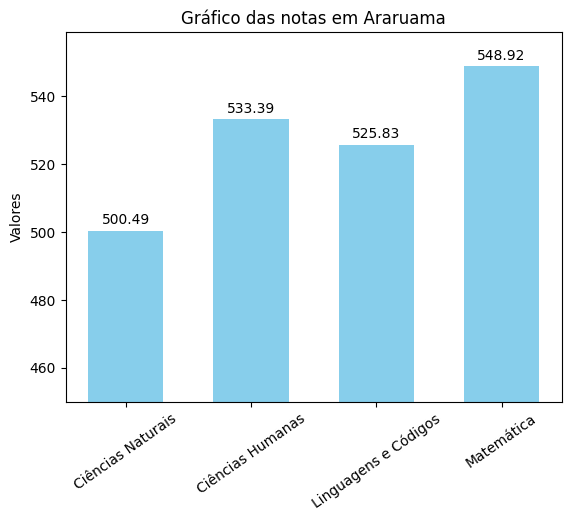

In [176]:
media_CN = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_CN'].mean()
media_CH = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_CH'].mean()
media_LC = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_LC'].mean()
media_MT = df[df['NO_MUNICIPIO_PROVA'] == 'Araruama']['NU_NOTA_MT'].mean()


medias = [media_CN, media_CH, media_LC, media_MT]
cidades = ['Ciências Naturais', 'Ciências Humanas','Linguagens e Códigos', 'Matemática']


plt.ylim(450, max(medias) + 10)  
bars = plt.bar(cidades, medias,width=0.6, color='skyblue')
plt.xticks(rotation=35)  # Ajuste o valor do ângulo conforme necessário

for bar in bars:
    yval = round(bar.get_height(),2)  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
             str(yval), ha='center', va='bottom', fontsize=10)  
    

plt.title('Gráfico das notas em Araruama')
plt.ylabel('Valores')


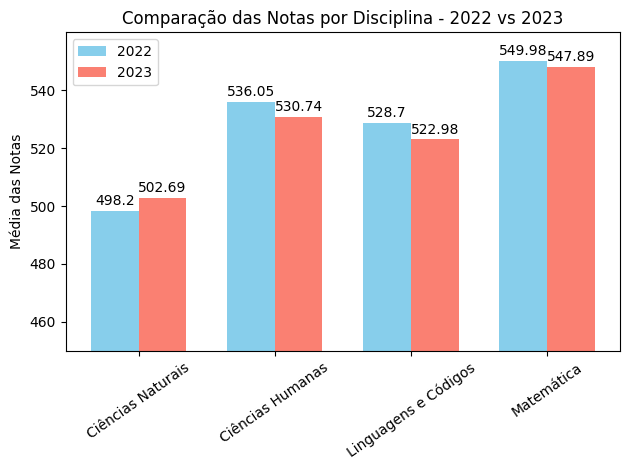

In [172]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular médias para os anos de 2022 e 2023
media_CN_2022 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2022)]['NU_NOTA_CN'].mean()
media_CN_2023 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2023)]['NU_NOTA_CN'].mean()

media_CH_2022 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2022)]['NU_NOTA_CH'].mean()
media_CH_2023 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2023)]['NU_NOTA_CH'].mean()

media_LC_2022 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2022)]['NU_NOTA_LC'].mean()
media_LC_2023 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2023)]['NU_NOTA_LC'].mean()

media_MT_2022 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2022)]['NU_NOTA_MT'].mean()
media_MT_2023 = df[(df['NO_MUNICIPIO_PROVA'] == 'Araruama') & (df['NU_ANO'] == 2023)]['NU_NOTA_MT'].mean()

# Organizar as médias para os dois anos
medias_2022 = [media_CN_2022, media_CH_2022, media_LC_2022, media_MT_2022]
medias_2023 = [media_CN_2023, media_CH_2023, media_LC_2023, media_MT_2023]
cidades = ['Ciências Naturais', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática']

# Largura das barras
bar_width = 0.35

# Posições das barras
r1 = range(len(cidades))  # Posições para 2022
r2 = [x + bar_width for x in r1]  # Posições para 2023

# Plotando as barras
plt.bar(r1, medias_2022, color='skyblue', width=bar_width, label='2022')
plt.bar(r2, medias_2023, color='salmon', width=bar_width, label='2023')

# Adicionando os valores nas barras
for i in range(len(medias_2022)):
    plt.text(r1[i], medias_2022[i] + 1, round(medias_2022[i], 2), ha='center', va='bottom', fontsize=10)
    plt.text(r2[i], medias_2023[i] + 1, round(medias_2023[i], 2), ha='center', va='bottom', fontsize=10)

# Personalizando o gráfico
plt.xticks([r + bar_width / 2 for r in r1], cidades, rotation=35)
plt.ylim(450, max(max(medias_2022), max(medias_2023)) + 10)  # Ajuste o eixo Y
plt.title('Comparação das Notas por Disciplina - 2022 vs 2023')
plt.ylabel('Média das Notas')
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()
